In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import scipy  

df = pd.read_csv("/home/panu/Desktop/aibe/data/raw/marketing_campaign.csv" , sep = ";")  # Replace with cleaned path
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
print("Shape:", df.shape)
df.info()
df.describe()


Shape: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases   

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [3]:
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [4]:
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)
df.isnull().sum().sort_values(ascending=False)
#Filling the missing values using - Median Imputation

ID                     0
NumDealsPurchases      0
Z_Revenue              0
Z_CostContact          0
Complain               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
MntGoldProds           0
Year_Birth             0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Response               0
dtype: int64

In [5]:
from datetime import datetime

# Drop ID and constant-value columns
df.drop(columns=["ID", "Z_CostContact", "Z_Revenue"], inplace=True, errors= 'ignore')

# Convert 'Dt_Customer' to datetime and calculate Customer Tenure
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Customer_Tenure'] = (datetime(2025, 7, 14) - df['Dt_Customer']).dt.days
df.drop(columns=['Dt_Customer'], inplace=True)

# Create aggregated features
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpend'] = df[spend_cols].sum(axis=1)

df['TotalChildren'] = df['Kidhome'] + df['Teenhome']
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                             'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=False)

# Drop redundant columns
df.drop(columns=spend_cols + ['Kidhome', 'Teenhome',
                              'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                              'AcceptedCmp4', 'AcceptedCmp5'], inplace=True)

# Final check
print("✅ Preprocessing complete!")
print("🔎 Final shape:", df.shape)
df.head()


✅ Preprocessing complete!
🔎 Final shape: (2240, 27)


,Year_Birth,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,58,3,8,10,4,7,0,1,...,False,False,False,False,False,False,True,False,False,False
1,1954,46344.0,38,2,1,1,2,5,0,0,...,False,False,False,False,False,False,True,False,False,False
2,1965,71613.0,26,1,8,2,10,4,0,0,...,False,False,False,False,False,False,False,True,False,False
3,1984,26646.0,26,2,2,0,4,6,0,0,...,False,False,False,False,False,False,False,True,False,False
4,1981,58293.0,94,5,5,3,6,5,0,0,...,False,True,False,False,False,True,False,False,False,False


In [9]:
df['Response'].value_counts(normalize=True).map("{:.2%}".format)



Response
0    85.09%
1    14.91%
Name: proportion, dtype: object

In [10]:
# Correlation of numerical features with Response
target_corr_df = df.corr(numeric_only=True)['Response'].sort_values(ascending=False)

# Show top correlations
target_corr_df


Response                   1.000000
TotalAcceptedCmp           0.426035
TotalSpend                 0.265298
NumCatalogPurchases        0.220810
Customer_Tenure            0.194481
NumWebPurchases            0.148730
Income                     0.132867
Marital_Status_Single      0.105161
Education_PhD              0.086764
Marital_Status_Divorced    0.055147
Marital_Status_Widow       0.051723
NumStorePurchases          0.039363
Marital_Status_YOLO        0.029449
Year_Birth                 0.021325
Marital_Status_Alone       0.018941
Education_Master           0.006178
NumDealsPurchases          0.002238
Complain                  -0.001707
NumWebVisitsMonth         -0.003987
Education_Graduation      -0.040217
Education_Basic           -0.049451
Marital_Status_Together   -0.075770
Marital_Status_Married    -0.079378
TotalChildren             -0.169163
Recency                   -0.198437
Name: Response, dtype: float64

/home/panu/Desktop/aibe/aibe-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


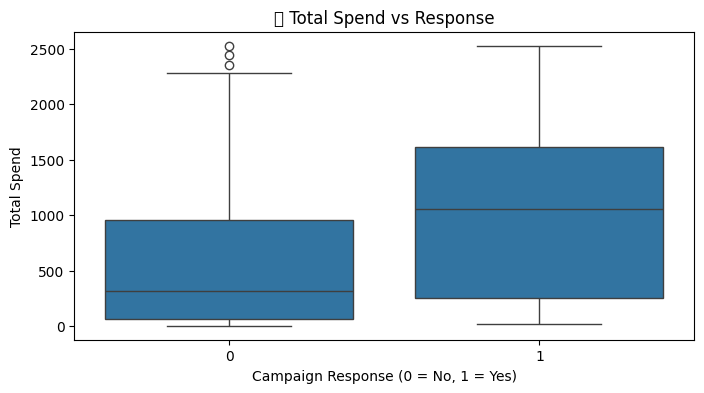

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x='Response', y='TotalSpend', data=df)
plt.title("🛍️ Total Spend vs Response")
plt.xlabel("Campaign Response (0 = No, 1 = Yes)")
plt.ylabel("Total Spend")
plt.show()


/home/panu/Desktop/aibe/aibe-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


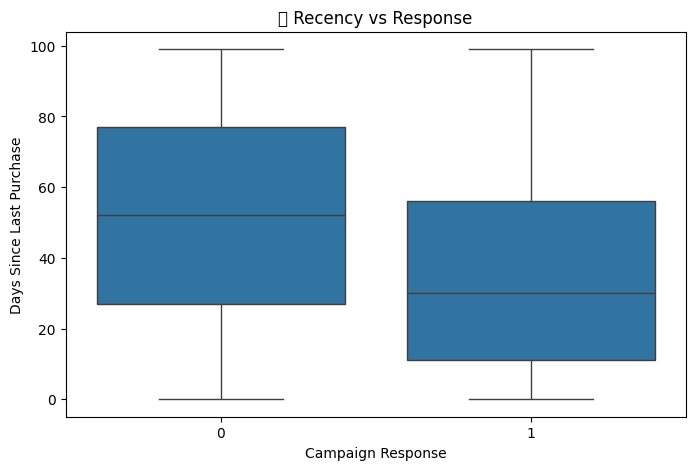

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Response', y='Recency', data=df)
plt.title("⏱️ Recency vs Response")
plt.xlabel("Campaign Response")
plt.ylabel("Days Since Last Purchase")
plt.show()


/home/panu/Desktop/aibe/aibe-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


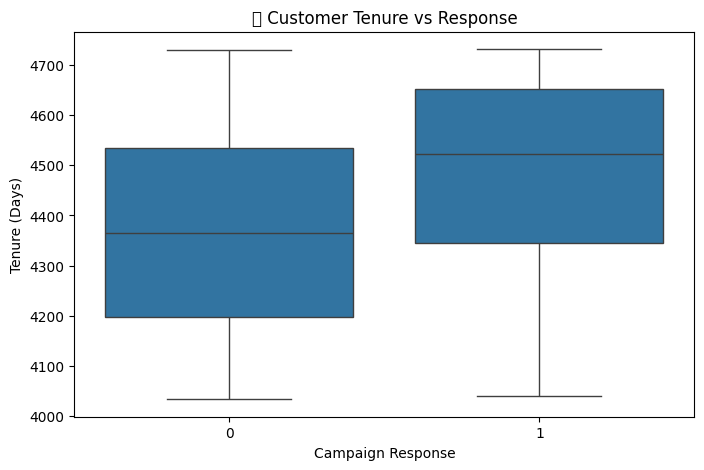

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Response', y='Customer_Tenure', data=df)
plt.title("📆 Customer Tenure vs Response")
plt.xlabel("Campaign Response")
plt.ylabel("Tenure (Days)")
plt.show()


In [11]:
# Reload original columns just for reference (for visualization)
original_df = pd.read_csv("/home/panu/Desktop/aibe/data/raw/marketing_campaign.csv", sep=";")

# Attach original columns back to the processed df
df['Education_Original'] = original_df['Education']
df['Marital_Status_Original'] = original_df['Marital_Status']


/tmp/ipykernel_24746/123585561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_resp.index, y=edu_resp.values, palette="Set2")
/home/panu/Desktop/aibe/aibe-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


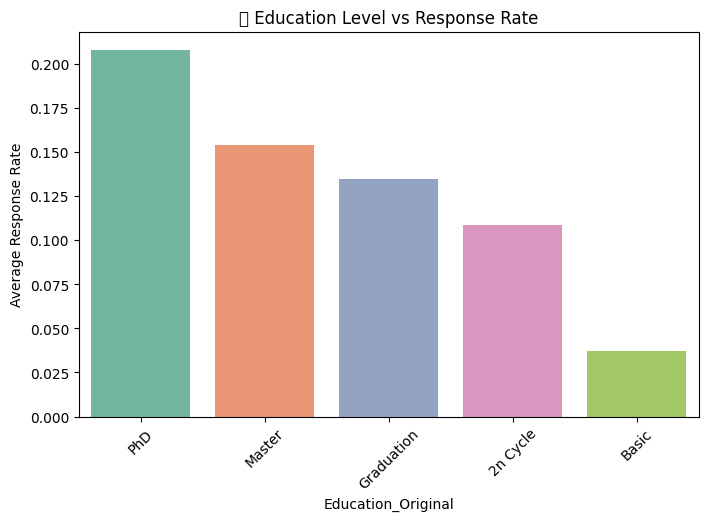

In [14]:
plt.figure(figsize=(8,5))
edu_resp = df.groupby('Education_Original')['Response'].mean().sort_values(ascending=False)

sns.barplot(x=edu_resp.index, y=edu_resp.values, palette="Set2")
plt.title("🎓 Education Level vs Response Rate")
plt.ylabel("Average Response Rate")
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_24746/763851302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_resp.index, y=marital_resp.values, palette="Set3")
/home/panu/Desktop/aibe/aibe-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128141 (\N{RING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


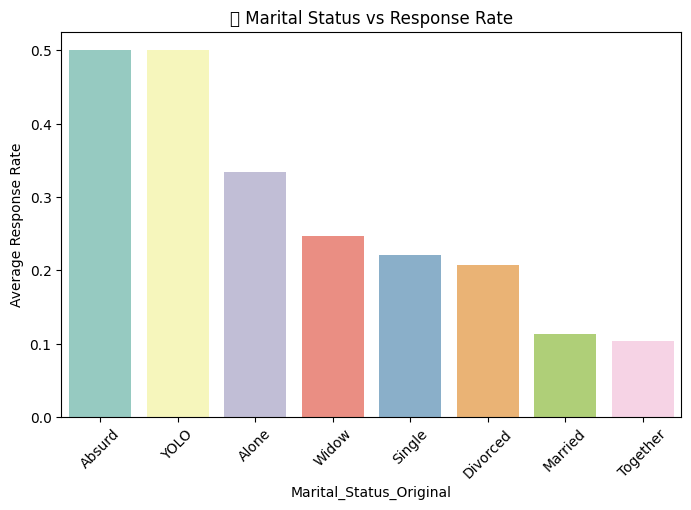

In [15]:
plt.figure(figsize=(8,5))
marital_resp = df.groupby('Marital_Status_Original')['Response'].mean().sort_values(ascending=False)

sns.barplot(x=marital_resp.index, y=marital_resp.values, palette="Set3")
plt.title("💍 Marital Status vs Response Rate")
plt.ylabel("Average Response Rate")
plt.xticks(rotation=45)
plt.show()


 1. Response Imbalance

    ~ Only 14.9% of customers responded positively to the campaign.

    ~ Indicates a class imbalance, which will be important for modeling (Week 3).

 2. Strongest Positive Correlators to Response:

    Past responders are likely to respond again.
    High spenders are more engaged.
    Catalog buyers show high campaign interest.
    Longer loyalty increases response chances.
    Higher income customers are slightly more responsive.

    
 3. Negative Correlators to Response:

    Recent buyers (low recency) are more likely to respond.
    More children → lower response (possible time/money constraint).
    Married customers show lower response — possibly due to budget allocation decisions.

    
 4. Category Insights from Visuals:

    
    Education

    PhD and Master’s holders respond more than Basic or Graduation level.

    Educated customers may understand offers better or value the product more.

    Marital Status

    Singles, Divorced, and YOLOs are more responsive.

    Possibly more independent decision-makers or more impulse purchases.

📌 What This Means for Targeting

    🎯 Target:

        Long-tenure, high-income customers

        Singles or Divorced individuals

        Past responders (TotalAcceptedCmp > 0)

    🔻 Avoid:

        Recent joiners

        Large families

        Married households with low historical response